<a href="https://colab.research.google.com/github/PC1854/Masters_IT/blob/main/32513_Advanced_Data_Analytics_Algorithms_Assessment_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# prompt: connect with google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# prompt: unzip the file named "appliances+energy+prediction.zip" from the folder "32513 Advanced Data Analytics Algorithms"

import zipfile
import os

# Assuming the zip file is in the specified path
zip_file_path = "/content/drive/MyDrive/32513 Advanced Data Analytics Algorithms/appliances+energy+prediction.zip"
extract_path = "/content/drive/MyDrive/32513 Advanced Data Analytics Algorithms/"  # Extract to the same folder

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Successfully extracted '{zip_file_path}' to '{extract_path}'")
except FileNotFoundError:
    print(f"Error: File '{zip_file_path}' not found.")
except zipfile.BadZipFile:
    print(f"Error: Invalid zip file '{zip_file_path}'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Successfully extracted '/content/drive/MyDrive/32513 Advanced Data Analytics Algorithms/appliances+energy+prediction.zip' to '/content/drive/MyDrive/32513 Advanced Data Analytics Algorithms/'


In [15]:
# prompt: import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# prompt: Load the dataset that was extracted in the google drive above

import pandas as pd

# Assuming the extracted CSV file is named 'energydata_complete.csv'
file_path = "/content/drive/MyDrive/32513 Advanced Data Analytics Algorithms/energydata_complete.csv"

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    # You can now work with the DataFrame 'df'
    # For example, to display the first few rows:
    print(df.head())
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Check the file path.")
except pd.errors.EmptyDataError:
    print(f"Error: File '{file_path}' is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the file '{file_path}'. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Dataset loaded successfully.
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

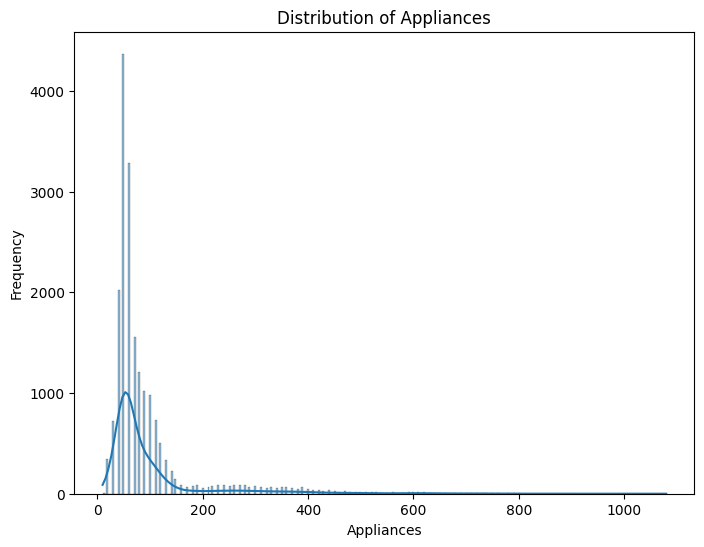

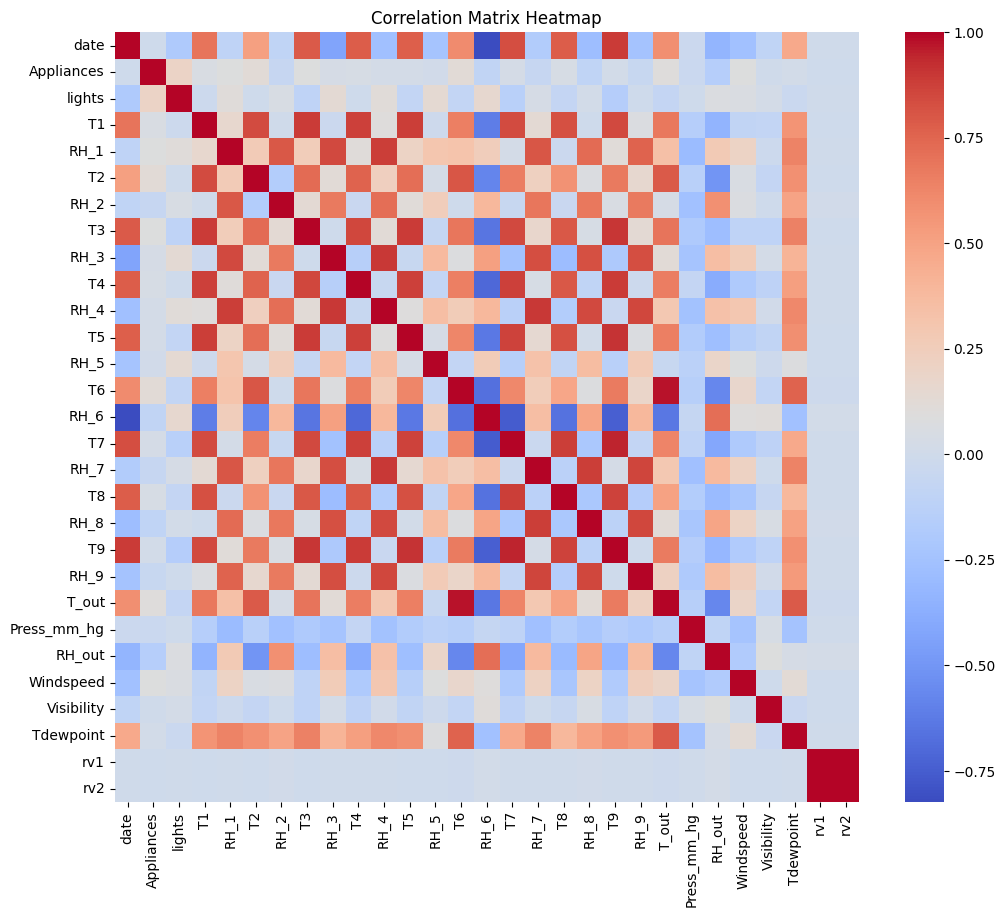

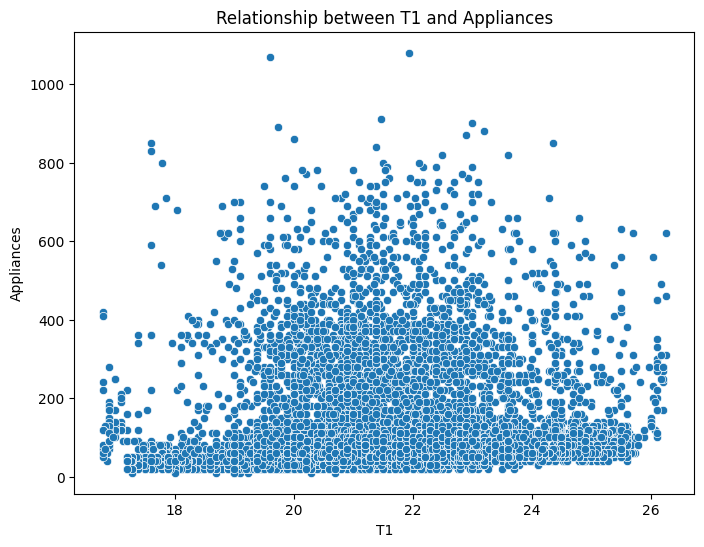

In [17]:
# prompt: Explore the data

# Display basic information about the DataFrame
print(df.info())

# Display descriptive statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Explore data types of each column
print(df.dtypes)

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime

# Example: Visualize the distribution of a numerical feature (e.g., 'Appliances')
plt.figure(figsize=(8, 6))
sns.histplot(df['Appliances'], kde=True)
plt.title('Distribution of Appliances')
plt.xlabel('Appliances')
plt.ylabel('Frequency')
plt.show()

# Example: Create a correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr() # Calculate correlation on numerical features only
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Example: Explore relationship between two variables (e.g., 'T1' and 'Appliances')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='T1', y='Appliances', data=df)
plt.title('Relationship between T1 and Appliances')
plt.xlabel('T1')
plt.ylabel('Appliances')
plt.show()

In [18]:
# prompt: Preprocess the Data
# Drop columns that are unnecessary (for example, the date column if you are not using it).
# Normalize or scale features (because temperature, humidity, etc. are on different scales).

from sklearn.preprocessing import MinMaxScaler

# ... (Your existing code) ...

# Drop unnecessary columns (e.g., 'date', 'lights')
df = df.drop(['date', 'lights'], axis=1)

# Normalize or scale features using MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Now 'normalized_df' contains your preprocessed data
print(normalized_df.head())


   Appliances       T1      RH_1        T2      RH_2        T3      RH_3  \
0    0.046729  0.32735  0.566187  0.225345  0.684038  0.215188  0.746066   
1    0.046729  0.32735  0.541326  0.225345  0.682140  0.215188  0.748871   
2    0.037383  0.32735  0.530502  0.225345  0.679445  0.215188  0.755569   
3    0.037383  0.32735  0.524080  0.225345  0.678414  0.215188  0.758685   
4    0.046729  0.32735  0.531419  0.225345  0.676727  0.215188  0.758685   

         T4      RH_4        T5  ...        T9      RH_9     T_out  \
0  0.351351  0.764262  0.175506  ...  0.223032  0.677290  0.372990   
1  0.351351  0.782437  0.175506  ...  0.226500  0.678532  0.369239   
2  0.344745  0.778062  0.175506  ...  0.219563  0.676049  0.365488   
3  0.341441  0.770949  0.175506  ...  0.219563  0.671909  0.361736   
4  0.341441  0.762697  0.178691  ...  0.219563  0.671909  0.357985   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
0     0.097674  0.894737   0.500000    0.

In [19]:
# prompt: Define X (features) and y (target)

# Define features (X) and target (y)
X = normalized_df.drop('Appliances', axis=1)
y = normalized_df['Appliances']


In [20]:
# prompt: Build and Train a Machine Learning Model
# Split data into train and test sets
# Choose a model to start with (example: Random Forest Regressor)
# Your goal here: Train a predictive model.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model (example: Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.003930160137268398


In [21]:
# prompt: Evaluate the Model
# Predict on test set
# Calculate evaluation metrics
# Your goal here: Show how well your model predicts energy usage.

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate the R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Root Mean Squared Error: 0.06269098928289774
R-squared: 0.5632528801146898


In [24]:
from sklearn.metrics import mean_absolute_error

# Assuming y_test are the actual values and y_pred are the predicted values
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.030025807082978855


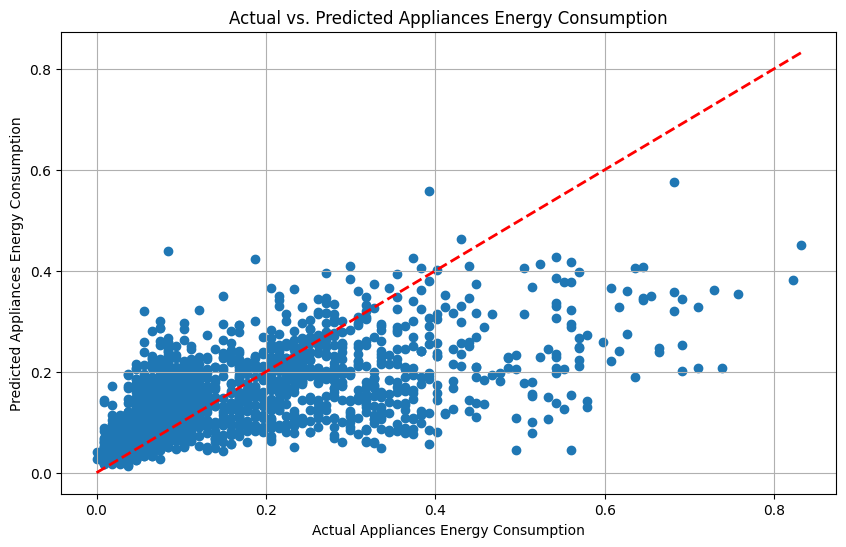

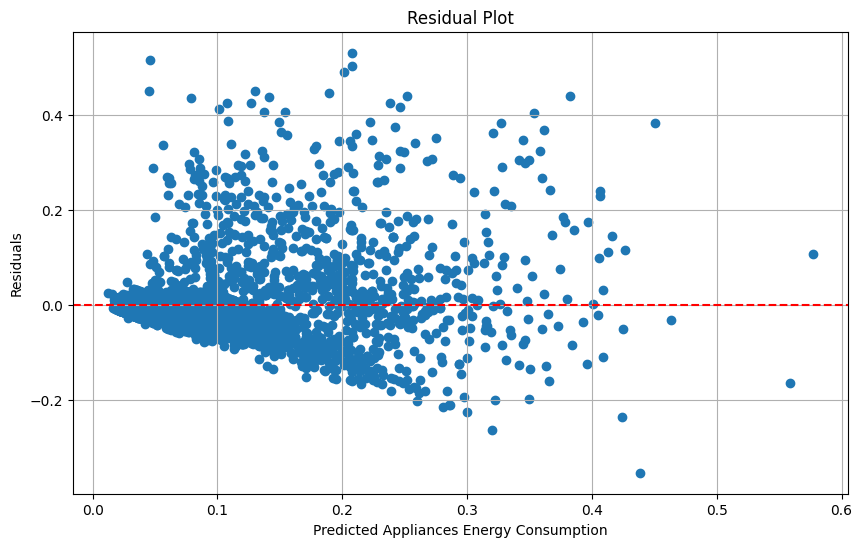

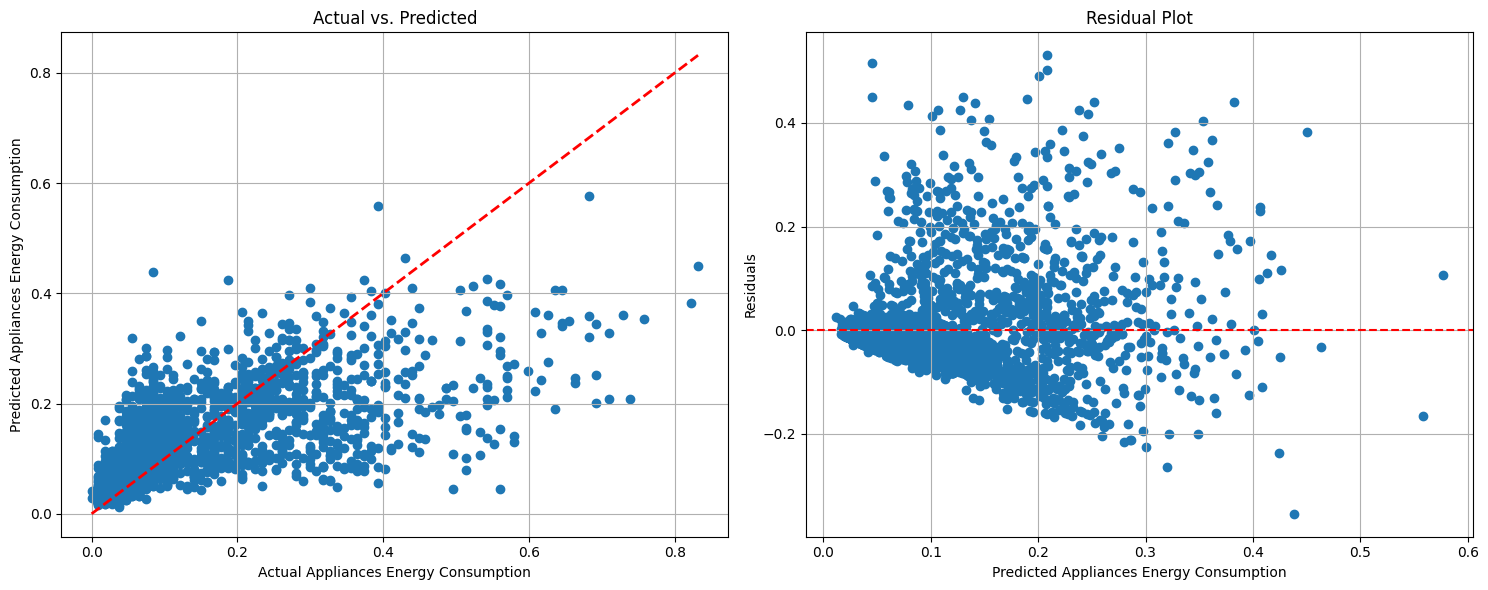

In [22]:
# prompt: Visualize Results
# Plot actual vs predicted
# Your goal here: Make your project look professional and easy to understand for your presentation.

# ... (Your existing code) ...

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Add diagonal line
plt.xlabel("Actual Appliances Energy Consumption")
plt.ylabel("Predicted Appliances Energy Consumption")
plt.title("Actual vs. Predicted Appliances Energy Consumption")
plt.grid(True)
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Predicted Appliances Energy Consumption")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


# Create a combined plot with actual vs predicted and residual plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
axes[0].set_xlabel("Actual Appliances Energy Consumption")
axes[0].set_ylabel("Predicted Appliances Energy Consumption")
axes[0].set_title("Actual vs. Predicted")
axes[0].grid(True)

# Residual Plot
axes[1].scatter(y_pred, residuals)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel("Predicted Appliances Energy Consumption")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residual Plot")
axes[1].grid(True)

plt.tight_layout()
plt.show()


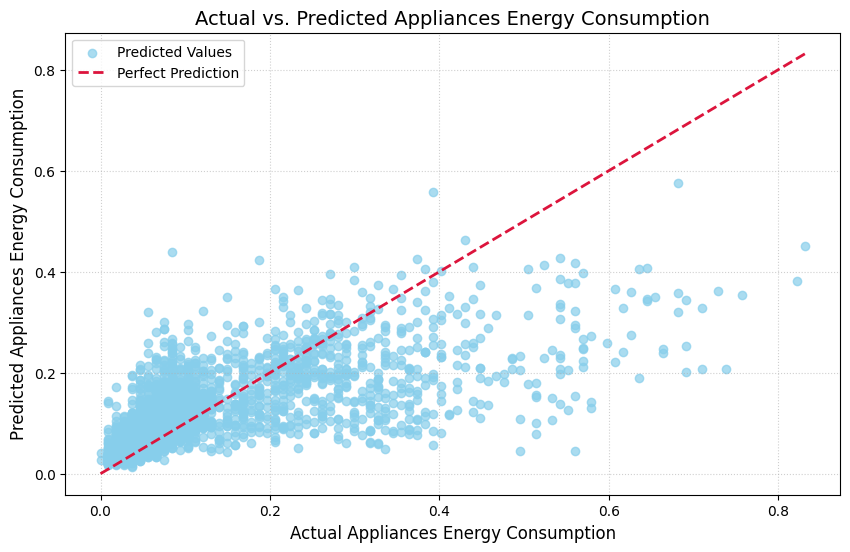

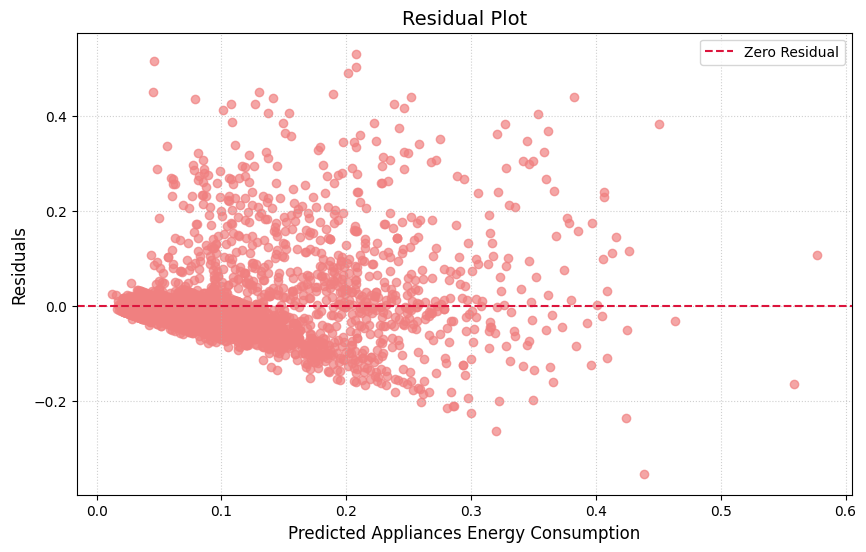

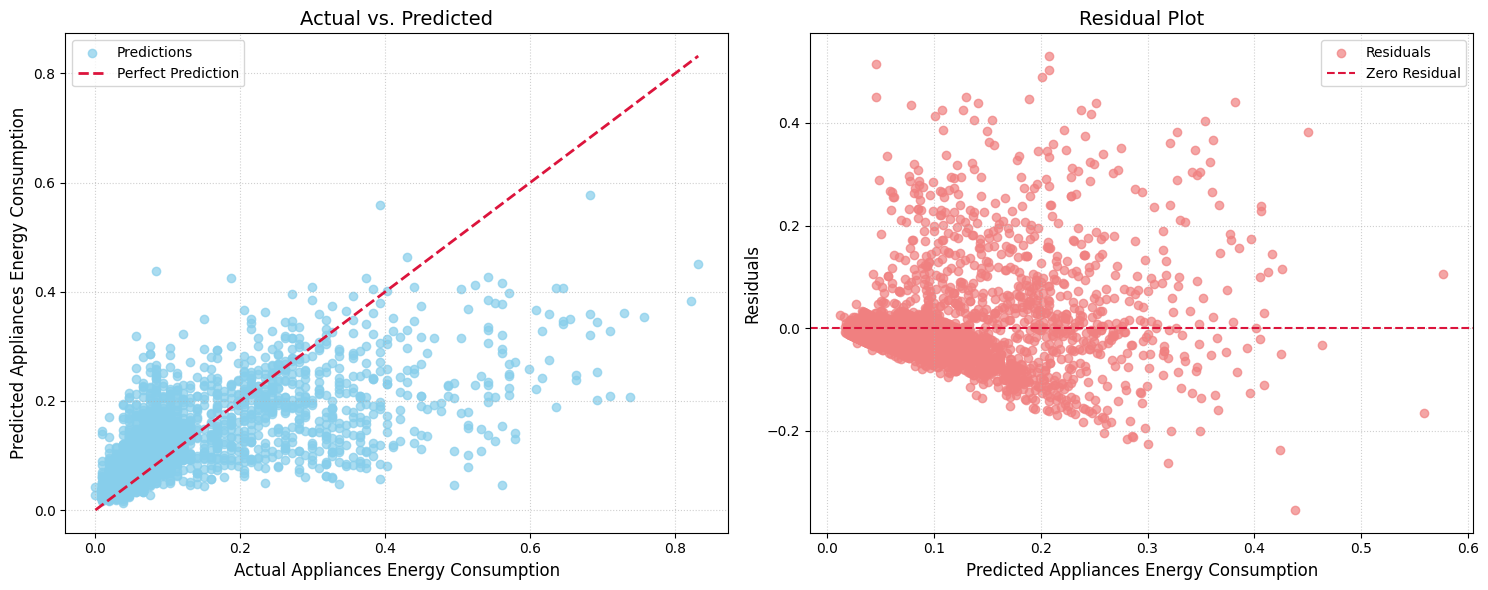

In [23]:
# prompt: prompt: Visualize Results
# # Plot actual vs predicted
# # Your goal here: Make your project look professional and easy to understand for your presentation.
# # change of colour in the plot

# ... (Your existing code) ...

# Visualize actual vs. predicted values with improved aesthetics
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='skyblue', label='Predicted Values', alpha=0.7) # Change color and add label
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='crimson', linewidth=2, label='Perfect Prediction') # Change color and add label
plt.xlabel("Actual Appliances Energy Consumption", fontsize=12) # Increase font size
plt.ylabel("Predicted Appliances Energy Consumption", fontsize=12) # Increase font size
plt.title("Actual vs. Predicted Appliances Energy Consumption", fontsize=14) # Increase font size
plt.grid(True, linestyle=':', alpha=0.6)  # Subtle grid
plt.legend(fontsize=10) # Add legend
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals with improved aesthetics
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='lightcoral', alpha=0.7) # Change color
plt.axhline(y=0, color='crimson', linestyle='--', linewidth=1.5, label='Zero Residual')  # Add a horizontal line at y=0 with label
plt.xlabel("Predicted Appliances Energy Consumption", fontsize=12) # Increase font size
plt.ylabel("Residuals", fontsize=12) # Increase font size
plt.title("Residual Plot", fontsize=14) # Increase font size
plt.grid(True, linestyle=':', alpha=0.6)  # Subtle grid
plt.legend()
plt.show()


# Create a combined plot with actual vs predicted and residual plot with enhanced visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred, color='skyblue', alpha=0.7, label='Predictions')
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='crimson', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel("Actual Appliances Energy Consumption", fontsize=12)
axes[0].set_ylabel("Predicted Appliances Energy Consumption", fontsize=12)
axes[0].set_title("Actual vs. Predicted", fontsize=14)
axes[0].grid(True, linestyle=':', alpha=0.6)
axes[0].legend(fontsize = 10)


# Residual Plot
axes[1].scatter(y_pred, residuals, color='lightcoral', alpha=0.7, label='Residuals')
axes[1].axhline(y=0, color='crimson', linestyle='--', linewidth=1.5, label='Zero Residual')
axes[1].set_xlabel("Predicted Appliances Energy Consumption", fontsize=12)
axes[1].set_ylabel("Residuals", fontsize=12)
axes[1].set_title("Residual Plot", fontsize=14)
axes[1].grid(True, linestyle=':', alpha=0.6)
axes[1].legend(fontsize = 10)

plt.tight_layout()
plt.show()
